## Importing Libraries & dataset

In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
df= pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.rename(columns={'FullDate':'ds','ElecPrice':'y'},inplace=True)
df['ds'] = pd.to_datetime(df['ds'])


## Dataset preparation & train,test Splitting

In [4]:
df.set_index('ds',inplace=True)
df = df.resample('D').sum().reset_index()

train = df.iloc[:2757,:]
test = df.iloc[2757:,:].drop('y',axis=1)
md = Prophet()


Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

<AxesSubplot: xlabel='ds'>

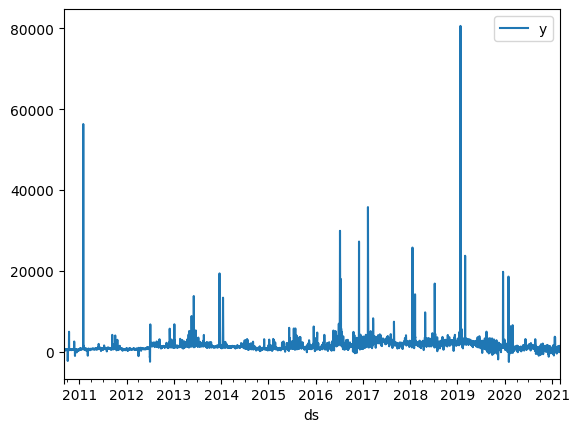

In [5]:
df.plot('ds','y')

Model Training & prediction

In [6]:
md.fit(train)

03:19:51 - cmdstanpy - INFO - Chain [1] start processing
03:19:51 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
pred = md.predict(test)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.799430,83.746983,4887.561742,2684.799430,2684.799430,-155.229589,-155.229589,-155.229589,9.738301,9.738301,9.738301,-164.967890,-164.967890,-164.967890,0.0,0.0,0.0,2529.569840
1,2018-03-21,2685.595004,278.924894,5008.647100,2685.595004,2685.595004,-2.715794,-2.715794,-2.715794,159.361120,159.361120,159.361120,-162.076914,-162.076914,-162.076914,0.0,0.0,0.0,2682.879210
2,2018-03-22,2686.390579,389.999220,5168.066017,2686.390579,2686.390579,95.496503,95.496503,95.496503,257.118925,257.118925,257.118925,-161.622421,-161.622421,-161.622421,0.0,0.0,0.0,2781.887082
3,2018-03-23,2687.186153,152.563496,4854.934716,2687.186153,2687.186153,-113.162769,-113.162769,-113.162769,50.275969,50.275969,50.275969,-163.438738,-163.438738,-163.438738,0.0,0.0,0.0,2574.023384
4,2018-03-24,2687.981728,19.859085,4922.149801,2687.981728,2687.981728,-438.737441,-438.737441,-438.737441,-271.453689,-271.453689,-271.453689,-167.283752,-167.283752,-167.283752,0.0,0.0,0.0,2249.244287


Q12

In [8]:
from statsmodels.tsa.stattools import adfuller
pval = adfuller(df["GasPrice"])
pval[1]

0.045027212884625335

In [9]:
pval1 = adfuller(df["SysLoad"])
pval1[1]

0.004253725504574104

Q13

In [10]:
Gas = adfuller(df["GasPrice"])
elec = adfuller(df["y"])
Gas
elec

(-8.269053866873808,
 4.848817773711457e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

Q14

In [11]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.799430,83.746983,4887.561742,2684.799430,2684.799430,-155.229589,-155.229589,-155.229589,9.738301,9.738301,9.738301,-164.967890,-164.967890,-164.967890,0.0,0.0,0.0,2529.569840
1,2018-03-21,2685.595004,278.924894,5008.647100,2685.595004,2685.595004,-2.715794,-2.715794,-2.715794,159.361120,159.361120,159.361120,-162.076914,-162.076914,-162.076914,0.0,0.0,0.0,2682.879210
2,2018-03-22,2686.390579,389.999220,5168.066017,2686.390579,2686.390579,95.496503,95.496503,95.496503,257.118925,257.118925,257.118925,-161.622421,-161.622421,-161.622421,0.0,0.0,0.0,2781.887082
3,2018-03-23,2687.186153,152.563496,4854.934716,2687.186153,2687.186153,-113.162769,-113.162769,-113.162769,50.275969,50.275969,50.275969,-163.438738,-163.438738,-163.438738,0.0,0.0,0.0,2574.023384
4,2018-03-24,2687.981728,19.859085,4922.149801,2687.981728,2687.981728,-438.737441,-438.737441,-438.737441,-271.453689,-271.453689,-271.453689,-167.283752,-167.283752,-167.283752,0.0,0.0,0.0,2249.244287


In [12]:

pred['ape'] = np.abs(pred['yhat'] - df['y']) / df['y']

# calculate the mean absolute percentage error
mape = pred['ape'].mean() * 100
mape

281.7911926822042

Q15

In [13]:
df['error'] = (pred['yhat'] - df['y'])**2
mse = df['error'].mean()
rmse = np.sqrt(mse)
rmse

2783.521251867937

Q16

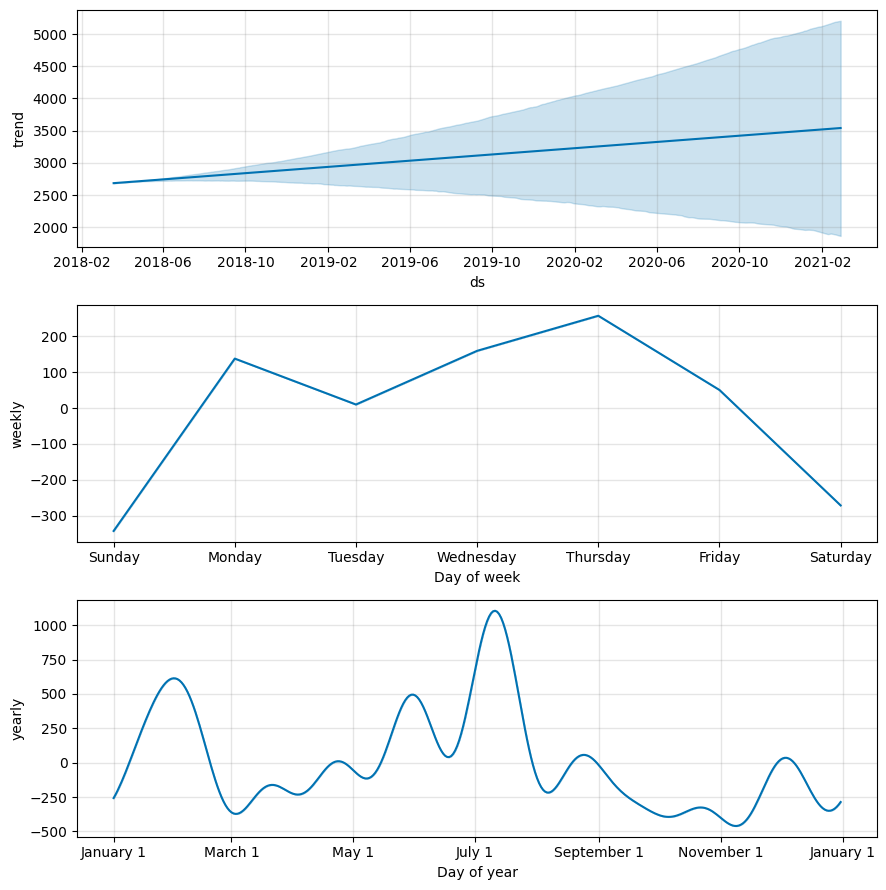

In [14]:
md.plot_components(pred);

In [16]:
m_mdl = Prophet()
m_mdl.add_regressor('SysLoad')
m_mdl.add_regressor('Tmax')
m_mdl.add_regressor('GasPrice')
# m_mdl.drop
m_mdl.fit(train)

03:20:56 - cmdstanpy - INFO - Chain [1] start processing
03:20:57 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
m_pred = m_mdl.predict(test)
m_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1871.425703,-258.556517,3977.004207,1871.425703,1871.425703,1099.405568,1099.405568,1099.405568,-856.023836,...,-84.454595,-84.454595,-84.454595,-39.207363,-39.207363,-39.207363,0.0,0.0,0.0,1991.380760
1,2018-03-21,1872.124165,-131.870150,4134.859686,1872.124165,1872.124165,1123.834573,1123.834573,1123.834573,-1025.966566,...,42.535850,42.535850,42.535850,-29.885751,-29.885751,-29.885751,0.0,0.0,0.0,1982.874763
2,2018-03-22,1872.822626,749.419667,5009.223308,1872.822626,1872.822626,1123.834573,1123.834573,1123.834573,-214.870019,...,145.665478,145.665478,145.665478,-24.819725,-24.819725,-24.819725,0.0,0.0,0.0,2902.851898
3,2018-03-23,1873.521087,438.780145,4861.416144,1873.521087,1873.521087,1056.312100,1056.312100,1056.312100,-274.783518,...,-44.272588,-44.272588,-44.272588,-23.868296,-23.868296,-23.868296,0.0,0.0,0.0,2587.119806
4,2018-03-24,1874.219548,-694.293267,3573.210855,1874.219548,1874.219548,786.397955,786.397955,786.397955,-1075.991095,...,-117.592505,-117.592505,-117.592505,-26.781080,-26.781080,-26.781080,0.0,0.0,0.0,1440.461913


Q17

In [18]:

m_pred['ape'] = np.abs(m_pred['yhat'] - df['y']) / df['y']

# calculate the mean absolute percentage error
mape = m_pred['ape'].mean() * 100
mape

237.6645890022341

Q18

In [19]:
df['error'] = (m_pred['yhat'] - df['y'])**2
mse = df['error'].mean()
rmse = np.sqrt(mse)
rmse

2597.2765102146604

Q20

In [20]:

m_pred['ape'] = np.abs(m_pred['yhat'] - df['y']) / df['y']

# calculate the mean absolute percentage error
mape = m_pred['ape'].mean() * 100
mape

237.6645890022341